# 1 Author 

Student Name: Shyam babu Valmiki

Student ID: 220522892


# **2 Problem Formulation**

The metadata has the data which specifies the area in which it is recorded. Here we try to solve this problem. 

So given a audio segment with the metadata of area in which it is recorded we are predicting the area by training our model.

# **3 Machine Learning Pipeline**

A sound is disturbance caused in surrounding air or it can be considered as wave propulsion. 

It can be represented on a time series graph. The amplitude of the wave represents the strength of the sound at given time.

For our problem to solve the abobe problem, we require features that helps us in training the model. 

We start by extracting the MFCC features of the audio segments.

Then we define a neural network. then we fit in the model and measure the performance of the model.

We shall furtheer try to improve the performance of the model as we continue.


# **4 Transformation Stage**

For the given files we extract the MFCC features here. We are converting the audio signals to numerical entities that can be measured and used by us for solving the given machine learning problem.

MFCC has a number of features we extract 40 features. each one of the attribute of the audio segment corresponds to a feature of the given audio segment. 

The inputs are the MFCC features of the audio segment and the output is the area in which the audio recorded.





# **5 Modelling**

First let us train a SVM after evaluating the performance of the SVM.

Later we build a neural network to classify the given audio files and evaluate its performance.

In basic part we tried classification using different models, they does not seem to be perform well. So lets try using a neural network here.

The audio segments are very complex and processing them might not be too easy and classifying them without enough samples is a challenging task.

The number of samples here should have been more in order to get a best fit model for the classification.

# **6 Methodology**
We start by training the SVM model using MFCC features and measure the accuracy. Later we visualize it using the confusion matrix. 

To test other models, we begin with neural network to see the performance of it on the dataset. We measure the performance and then compare it with the SVM. We will further fit other models and try to evaluate their performance.

# **7 Dataset**

We will extract both MFCC and the other features that we extracted during the basic component part and try to use bothe the features.

Let us mount to drive to access the audio files.



In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

Storing the audio segments and printing the number of samples.

In [ ]:
sample_path = '/content/drive/MyDrive/Data/MLEndLS/sample/*.wav'
files = glob.glob(sample_path)
len(files)

2500

Let us now read the metadata of the audio files.

In [ ]:
MLENDLS_df = pd.read_csv('./MLEndLS (1).csv').set_index('file_id') 
MLENDLS_df

,area,spot,in_out,Participant
file_id,,,,
0001.wav,british,street,outdoor,S151
0002.wav,kensington,dinosaur,indoor,S127
0003.wav,campus,square,outdoor,S18
0004.wav,kensington,hintze,indoor,S179
0005.wav,campus,square,outdoor,S176
...,...,...,...,...
2496.wav,westend,trafalgar,outdoor,S151
2497.wav,campus,square,outdoor,S6
2498.wav,westend,national,indoor,S96


Functions to get the MFCC and other features extracted in the basic componenets.

In [ ]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [ ]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  mfcc_features = []
  for file in tqdm(files):
    try:
      fileID = file.split('/')[-1]
      file_name = file.split('/')[-1]
      yi = labels_file.loc[fileID]['area']

      fs = None # if None, fs would be 22050
      x, fs = librosa.load(file,sr=fs)
      if scale_audio: x = x/np.max(np.abs(x))
      f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
      power = np.sum(x**2)/len(x)
      pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
      pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
      voiced_fr = np.mean(voiced_flag)

      xi = [power,pitch_mean,pitch_std,voiced_fr]
      mfcci = librosa.feature.mfcc(x,fs,n_mfcc=40)
      mfcci = np.mean(mfcci.T,axis = 0)
    

      X.append(xi)
      y.append(yi)
      mfcc_features.append(mfcci)

    except:
      continue

  return np.array(X),np.array(y),np.array(mfcc_features)

Call the function to extract the features and store them.

X contains the features Power, Pitch - mean, Pitch - standard deviation, Fraction of voiced region

y conatins the labels.

z contains the MFCC features.

In [ ]:
X,y,z = getXy(files, labels_file=MLENDLS_df, scale_audio=True, onlySingleDigit=True)

 28%|██▊       | 705/2500 [19:08<50:03,  1.67s/it]<ipython-input-8-798cdc811a56>:12: RuntimeWarning: invalid value encountered in true_divide
  if scale_audio: x = x/np.max(np.abs(x))
100%|█████████▉| 2499/2500 [1:08:10<00:01,  1.55s/it]/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
100%|██████████| 2500/2500 [1:08:10<00:00,  1.64s/it]


There are 40 aspects of audio segment that are stored as MFCC features. Lets have a look at them.

In [ ]:
z[:2]

array([[-1.04798477e+02,  1.20910492e+02, -3.91782074e+01,
         3.89396553e+01, -3.80679054e+01,  2.27108822e+01,
        -3.10048027e+01,  4.69994640e+00, -2.44324417e+01,
        -5.18842411e+00, -1.54441881e+01, -5.92727327e+00,
        -1.17950745e+01, -1.13213949e+01, -1.13582239e+01,
        -1.42321386e+01, -7.53225756e+00, -1.41910353e+01,
        -3.96773958e+00, -1.48007555e+01, -4.89104033e+00,
        -1.17112722e+01, -4.37213564e+00, -9.91007042e+00,
        -3.20195794e+00, -5.31495619e+00, -3.98656726e+00,
        -3.27520418e+00, -4.20520353e+00, -2.18990159e+00,
        -3.85206151e+00, -1.29421067e+00, -3.48816657e+00,
        -8.46816599e-01, -3.31417203e+00, -3.21415365e-01,
        -2.64515328e+00,  8.53252709e-02, -2.15219545e+00,
        -4.63793308e-01],
       [-1.96654373e+02,  1.83684433e+02, -3.93360672e+01,
         3.25799103e+01, -8.92820263e+00,  1.31697493e+01,
         2.08682752e+00,  1.48538589e+00,  8.49060154e+00,
        -9.12135124e+00,  8.75

Operations required to train the model.

In [ ]:
def concat_features_labels(z,y):
  return z,y

In [ ]:
extracted_feature = concat_features_labels(z,y)

In [ ]:
y1 = y

In [ ]:
y.shape

(2497, 6)

y1 = y

In [ ]:
#y = np.array(pd.get_dummies(y))

In [ ]:
y.shape

(2497, 6)

In [ ]:
z.shape

(2497, 40)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(z,y,test_size=0.3)

In [ ]:
X_train

array([[-1.5444293e+02,  1.9918173e+02, -1.6468859e+01, ...,
        -1.5372493e+00,  2.5858682e-01, -2.8142142e-01],
       [-2.6970499e+02,  1.5267389e+02,  8.3842545e+00, ...,
         6.0871416e-01,  3.7564060e-01,  5.1838744e-01],
       [-2.6359421e+02,  1.9777010e+02,  8.0810413e+00, ...,
         7.5542957e-01, -1.2089976e+00, -1.8239326e+00],
       ...,
       [-2.7590146e+02,  1.5696593e+02, -1.1972908e+00, ...,
         5.8791530e-01,  2.2867410e-02,  2.1894326e+00],
       [-1.8613283e+02,  2.0393959e+02, -4.0805389e+01, ...,
        -1.7885153e+00, -3.8372049e-01, -1.3870696e+00],
       [-2.2479449e+02,  1.8025966e+02, -2.7300211e+01, ...,
         8.9853054e-01, -1.0637032e+00,  1.0463054e+00]], dtype=float32)

In [ ]:
y_train

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0]], dtype=uint8)

# **8 Results**


#classification using neural network

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.9.2


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
num_labels = y.shape[1]

In [ ]:
model = Sequential()

model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))


The neural network description is as follows.

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               4100      
                                                                 
 activation_24 (Activation)  (None, 100)               0         
                                                                 
 dropout_18 (Dropout)        (None, 100)               0         
                                                                 
 dense_25 (Dense)            (None, 200)               20200     
                                                                 
 activation_25 (Activation)  (None, 200)               0         
                                                                 
 dropout_19 (Dropout)        (None, 200)               0         
                                                                 
 dense_26 (Dense)            (None, 100)              

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',verbose=1, save_best_only = True)

start = datetime.now()

model.fit(X_train, y_train, batch_size = num_batch_size, epochs = num_epochs, validation_data=(X_val,y_val),callbacks=[checkpointer])

duration = datetime.now() - start

Epoch 1/100
52/55 [===========================>..] - ETA: 0s - loss: 1.6036 - accuracy: 0.3365
Epoch 1: val_loss improved from inf to 1.60851, saving model to saved_models/audio_classification.hdf5
55/55 [==============================] - 0s 7ms/step - loss: 1.5991 - accuracy: 0.3412 - val_loss: 1.6085 - val_accuracy: 0.3013
Epoch 2/100
52/55 [===========================>..] - ETA: 0s - loss: 1.5945 - accuracy: 0.3425
Epoch 2: val_loss did not improve from 1.60851
55/55 [==============================] - 0s 6ms/step - loss: 1.5946 - accuracy: 0.3412 - val_loss: 1.6174 - val_accuracy: 0.3013
Epoch 3/100
49/55 [=========================>....] - ETA: 0s - loss: 1.5957 - accuracy: 0.3431
Epoch 3: val_loss did not improve from 1.60851
55/55 [==============================] - 0s 6ms/step - loss: 1.5941 - accuracy: 0.3412 - val_loss: 1.6104 - val_accuracy: 0.3013
Epoch 4/100
49/55 [=========================>....] - ETA: 0s - loss: 1.6014 - accuracy: 0.3348
Epoch 4: val_loss did not improve fr

In [ ]:
test_accuracy = model.evaluate(X_val,y_val,verbose=0)
print(test_accuracy[1])

0.42933332920074463


## Lets try to fit in a SVM model.

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm

pipe = Pipeline([('scaler',StandardScaler()),('svm',svm.SVC(C=1))])
X_train, X_val, y_train, y_val = train_test_split(z,y1,test_size=0.3)


In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=1))])

In [ ]:
print(pipe.score(X_val,y_val))

0.44533333333333336


### Let us plot a confusion matrix.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1800x720 with 0 Axes>

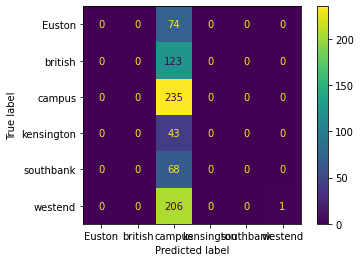

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

scaler = StandardScaler()
scaler.fit(X_train)
clf = svm.SVC(C=1,gamma=2)
clf.fit(X_train, y_train)

f = plt.figure()
f.set_figwidth(25)
f.set_figheight(10)
  
plot_confusion_matrix(clf, X_val, y_val)  
plt.show()

# **9 Conclusion**



### Let us try combining the MFCC and the other extracted features and train  the neural network.

In [ ]:
X_train1 = X_train

In [ ]:
X_train.shape

(1747, 4)

In [ ]:
X.shape

(2497, 4)

In [ ]:
z.shape

(2497, 40)

In [ ]:
data = np.append(z, X, axis=1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data,y,test_size=0.3)

In [ ]:
num_labels = y.shape[1]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

num_labels = y.shape[1]

model = Sequential()

model.add(Dense(100,input_shape=(44,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime



Epoch 1/100
47/55 [========================>.....] - ETA: 0s - loss: 29.5344 - accuracy: 0.2267
Epoch 1: val_loss improved from inf to 1.83107, saving model to saved_models/audio_classification.hdf5
55/55 [==============================] - 2s 9ms/step - loss: 27.1905 - accuracy: 0.2318 - val_loss: 1.8311 - val_accuracy: 0.2547
Epoch 2/100
41/55 [=====================>........] - ETA: 0s - loss: 9.6281 - accuracy: 0.2119 
Epoch 2: val_loss improved from 1.83107 to 1.79445, saving model to saved_models/audio_classification.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 8.7916 - accuracy: 0.2032 - val_loss: 1.7945 - val_accuracy: 0.1533
Epoch 3/100
43/55 [======================>.......] - ETA: 0s - loss: 4.5425 - accuracy: 0.2137
Epoch 3: val_loss improved from 1.79445 to 1.76725, saving model to saved_models/audio_classification.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 4.2906 - accuracy: 0.2112 - val_loss: 1.7673 - val_accuracy: 0.2880
Epoch 4/

In [ ]:
num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',verbose=1, save_best_only = True)

start = datetime.now()

model.fit(X_train, y_train, batch_size = num_batch_size, epochs = num_epochs, validation_data=(X_val,y_val),callbacks=[checkpointer])

duration = datetime.now() - start


Epoch 1/100
44/55 [=======================>......] - ETA: 0s - loss: 1.2659 - accuracy: 0.5021
Epoch 1: val_loss improved from inf to 1.46521, saving model to saved_models/audio_classification.hdf5
55/55 [==============================] - 0s 6ms/step - loss: 1.2490 - accuracy: 0.5066 - val_loss: 1.4652 - val_accuracy: 0.4333
Epoch 2/100
52/55 [===========================>..] - ETA: 0s - loss: 1.2633 - accuracy: 0.4952
Epoch 2: val_loss did not improve from 1.46521
55/55 [==============================] - 0s 7ms/step - loss: 1.2632 - accuracy: 0.4963 - val_loss: 1.4946 - val_accuracy: 0.4413
Epoch 3/100
48/55 [=========================>....] - ETA: 0s - loss: 1.2561 - accuracy: 0.5130
Epoch 3: val_loss did not improve from 1.46521
55/55 [==============================] - 0s 6ms/step - loss: 1.2575 - accuracy: 0.5140 - val_loss: 1.4666 - val_accuracy: 0.4320
Epoch 4/100
53/55 [===========================>..] - ETA: 0s - loss: 1.2261 - accuracy: 0.4976
Epoch 4: val_loss did not improve fr

In [ ]:
test_accuracy = model.evaluate(X_val,y_val,verbose=0)
print(test_accuracy[1])

0.445333331823349


# **Summary**
The observations shows that there is a lot of disturbance in the audio segments that makes it hard to classify them to a particular area. A better recording environment and a device are crucial for these type of classifications. 

We need a better preprocessing techniques for reducing the noise in the signal. This might help in improving the performance of the model.

Some audios are really confusing. Consider the previous basic component where we classified audio segments as indoor and outdoor. Ther are many indoors where we could hear the sounds of vehicles. Similarly there are many outdoors which are so quite so be classified as outdoor audio segments. 

When working with the advanced part we see that the neural network fails to classify the audio segments accordingly. The reason may be because of insufficient dataset. By increasing the sample size we could really improve the performance of the model to greater extent.
